In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import SMOTE

## EDA

### Understanding the Dataset

In [2]:
# pd.read_csv is used to read your dataset(i.e in csv)
df=pd.read_csv("/content/drive/MyDrive/Internship/fraud test.csv")

In [3]:
# return top 5 rows of dataset
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# return last 5 rows of dataset
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,31/12/2020 23:59,4.170690e+15,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,10/05/1993,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [5]:
df.sample(5) #1 fraud and 0 not

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
465770,465770,12/12/2020 11:02,4.427810e+12,"fraud_Robel, Cummerata and Prosacco",gas_transport,84.50,Michelle,Rodriguez,F,1742 Brandon Squares Apt. 461,...,33.3305,-105.6933,8874,Licensed conveyancer,16/08/2000,5952bdcc53c8af876d1ea35e4ff70124,1386846162,33.795738,-104.737535,0
198628,198628,30/08/2020 12:27,3.776550e+14,fraud_Kozey-Kuhlman,personal_care,12.10,Lawrence,Davis,M,7421 Serrano Lane Apt. 580,...,36.0435,-84.0400,25459,"Teacher, special educational needs",22/02/1969,5c0552e87c461000586ebe8b3ed32cbf,1377865646,36.994511,-83.132802,0
379421,379421,16/11/2020 12:00,3.026350e+13,fraud_Nolan-Williamson,kids_pets,17.75,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,24/11/1961,b9716cecbbb284dc972638f7f7a3fb15,1384603214,38.155962,-112.843893,0
127626,127626,04/08/2020 14:01,4.104310e+15,fraud_Reilly and Sons,health_fitness,21.65,Brooke,Rodriguez,F,901 Todd Gardens Apt. 466,...,33.6401,-116.5567,1661,"Therapist, music",19/09/1988,9709427372c5e4641df3eeca6340051e,1375624893,34.103421,-116.656859,0
90616,90616,22/07/2020 10:43,3.712260e+14,fraud_Sporer Inc,gas_transport,48.29,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,...,38.9311,-89.2463,1810,Race relations officer,24/12/1974,afd69f8dfdbc76a2b47a1857440bfbe7,1374489786,39.202440,-89.102814,0


In [6]:
df.shape  # Return dimesion of dataset

(555719, 23)

In [7]:
df.info()# Shows all columns name,non-null count and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
# Return summary statictics of your dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800430e+14,3.521420e+15,4.635330e+15,4.992350e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


In [9]:
# Return summary statictics of your dataset but of objects data types
df.describe(include=object).T

,count,unique,top,freq
trans_date_trans_time,555719,226976,15/12/2020 21:26,16
merchant,555719,693,fraud_Kilback LLC,1859
category,555719,14,gas_transport,56370
first,555719,341,Christopher,11443
last,555719,471,Smith,12146
gender,555719,2,F,304886
street,555719,924,444 Robert Mews,1474
city,555719,849,Birmingham,2423
state,555719,50,TX,40393
job,555719,478,Film/video editor,4119


### Checking Null Values and dubplicate value

In [10]:
 # to check total number of null values
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
df.duplicated().sum()  # to check duplicate values

0

In [12]:
df.dtypes # to check data types

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [13]:
df.columns # reruen all columns name

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
 # it will remove the column (i.e loan_id)
df.drop(columns={'Unnamed: 0','trans_date_trans_time','cc_num','first', 'last','street','zip',
       'lat', 'long', 'city_pop'},inplace=True)

In [15]:
df.drop(columns={'dob'},inplace=True)

In [16]:
df.drop(columns={'trans_num','unix_time'},inplace=True)

In [17]:
df.drop(columns={"city",'merch_lat','merch_long'},inplace=True)

In [18]:
df.head()

,merchant,category,amt,gender,state,job,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,Mechanical engineer,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,"Sales professional, IT",0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,"Librarian, public",0
3,fraud_Haley Group,misc_pos,60.05,M,FL,Set designer,0
4,fraud_Johnston-Casper,travel,3.19,M,MI,Furniture designer,0


In [19]:
# to check unique value in all object data type using for loop
for i in df.select_dtypes(include=object):
  unique=df[i].value_counts()
  print()
  print(unique)



merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

gender
F    304886
M    250833
Name: count, dtype: int64

state
TX    40

In [20]:
# to check total number of unique value in all object data type using for loop
for i in df.select_dtypes(include=object):
  unique=df[i].nunique()
  print(i)
  print(unique)

merchant
693
category
14
gender
2
state
50
job
478


In [21]:
df['is_fraud'].value_counts() #To check the value as data is unbalanced 0 is not fraud and 1 is frad

is_fraud
0    553574
1      2145
Name: count, dtype: int64

### Data Visualization

is_fraud
0    553574
1      2145
Name: count, dtype: int64

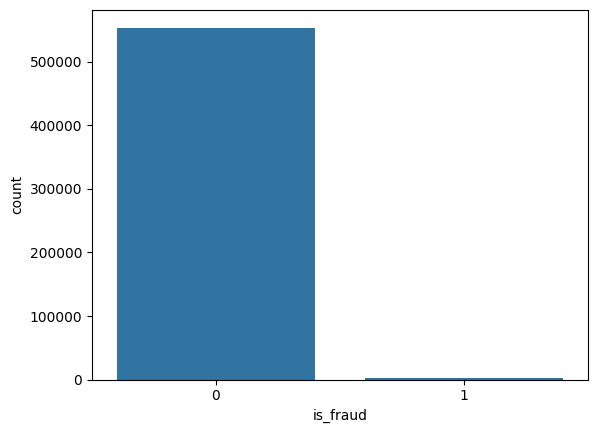

In [22]:
# To check the value as data is unbalanced 0 is not fraud and 1 is frad in visualization
sns.countplot(x = 'is_fraud', data = df)
df['is_fraud'].value_counts()


Text(0.5, 1.0, 'Total frauds by gender')

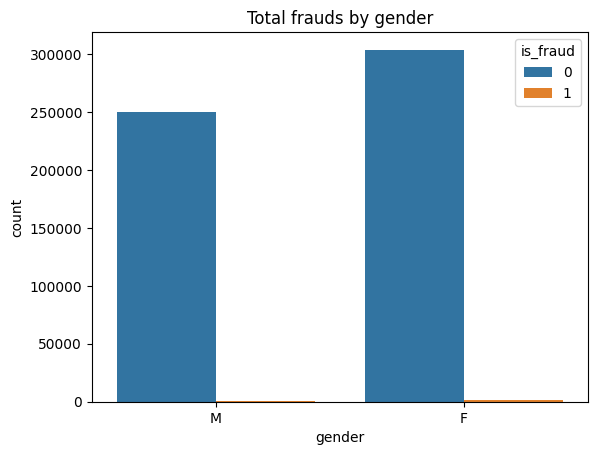

In [23]:
#To check fraud
#  0 is not fraud and 1 is frad by gender
sns.countplot(x = 'gender', data = df, hue = 'is_fraud')
plt.title("Total frauds by gender")

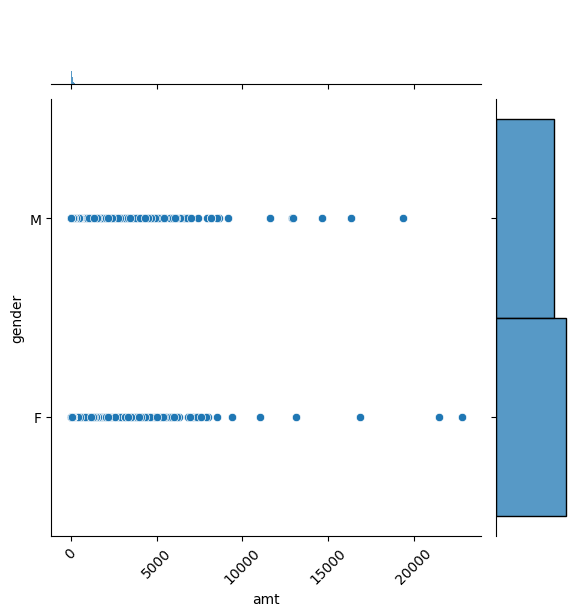

In [24]:
# using seaborn library to see the relation between male and female how it affecting cibil score
sns.jointplot(data=df,x="amt",y="gender")
plt.xticks(rotation=45)
plt.show()
#feamle has spend more amount than male

In [25]:
# show the relation of integer column
df.corr=df.select_dtypes(include=['int64','float']).corr()

In [26]:
df.corr

,amt,is_fraud
amt,1.000000,0.182267
is_fraud,0.182267,1.000000


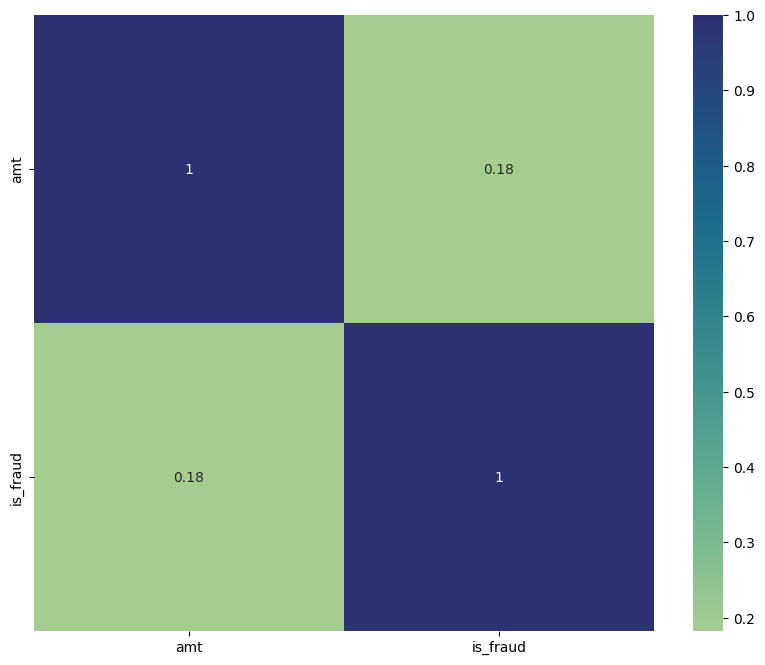

In [27]:
# by using seaborn library we can see the more the darker box is more it is related to other columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr,annot=True,cmap="crest")
plt.xticks()
plt.show()

In [28]:
df.head()

,merchant,category,amt,gender,state,job,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,Mechanical engineer,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,"Sales professional, IT",0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,"Librarian, public",0
3,fraud_Haley Group,misc_pos,60.05,M,FL,Set designer,0
4,fraud_Johnston-Casper,travel,3.19,M,MI,Furniture designer,0


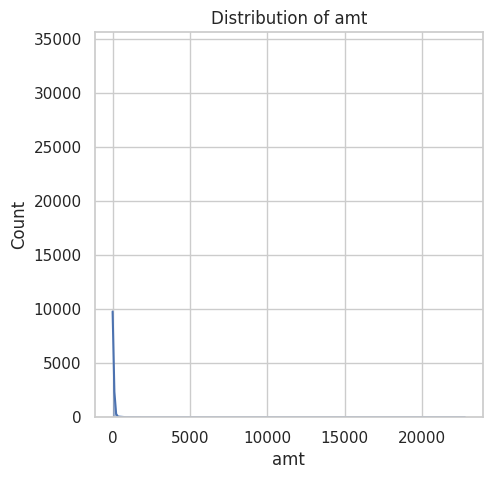

Axes(0.125,0.11;0.775x0.77)


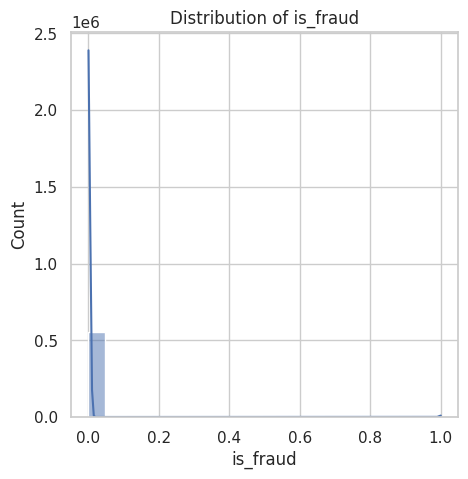

Axes(0.125,0.11;0.775x0.77)


In [29]:
# to check the distribution of all coumns using histplot using for loop
for i in df.select_dtypes(include=['int64','float']):
  sns.set(style="whitegrid")
  plt.figure(figsize=(5,5))
  his=sns.histplot(df[i],kde=True)
  plt.title(f"Distribution of {i}")
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()
  print(his)

<Axes: >

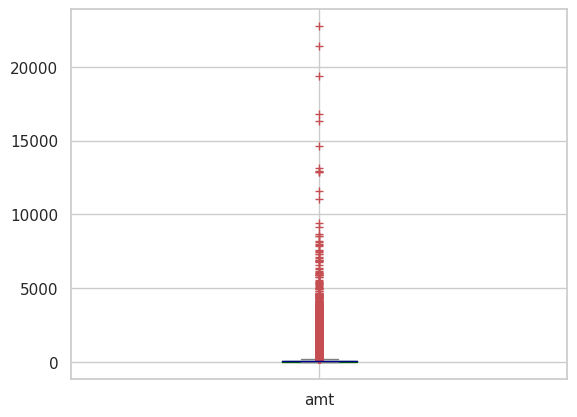

In [30]:
# to check the outliers in datatset which include datatype having int and float
colors = {
"boxes": "DarkGreen",
"whiskers": "DarkOrange",
"medians": "DarkBlue",
"caps": "Gray",
}
df['amt'].plot.box(color=colors, sym="r+")

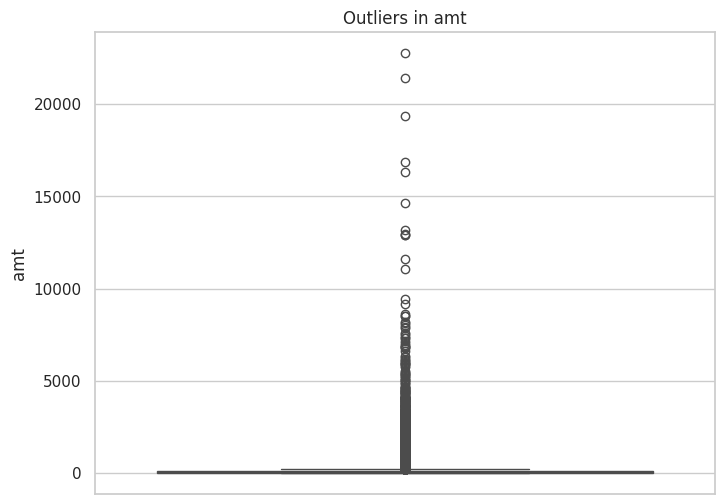

Axes(0.125,0.11;0.775x0.77)


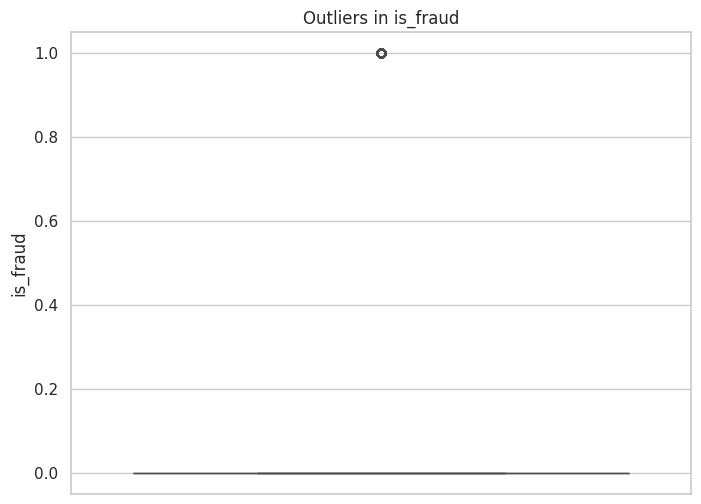

Axes(0.125,0.11;0.775x0.77)


In [31]:
# to check the outliers in datatset which include datatype having int and float
for i in df.select_dtypes(include=['int64','float']):
  plt.figure(figsize=(8,6))
  out=sns.boxplot(df[i])
  plt.title(f"Outliers in {i}")
  plt.show()
  print(out)

<ipython-input-32-9739e8be3f6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],palette='viridis',width=0.6)


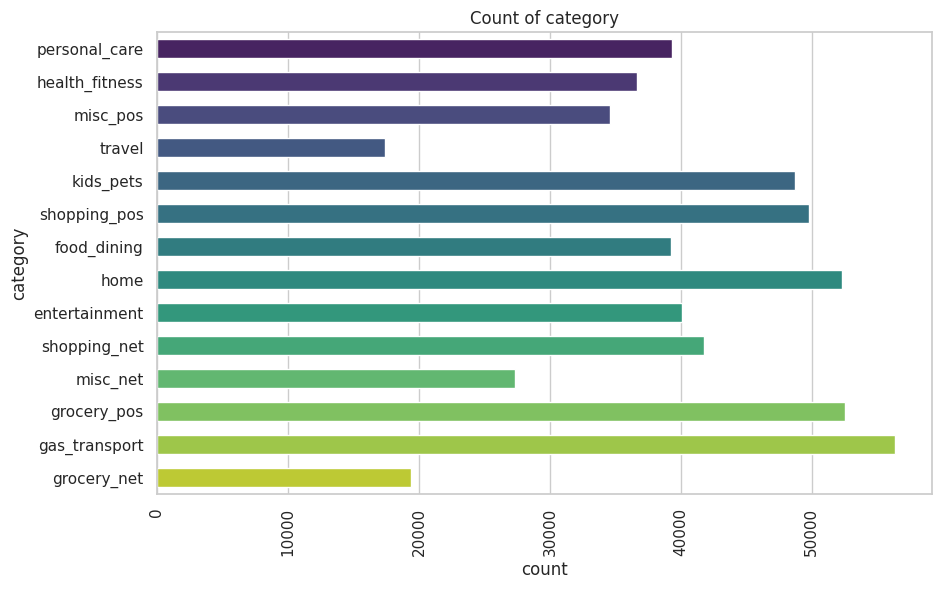

Axes(0.125,0.11;0.775x0.77)


<ipython-input-32-9739e8be3f6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  count=sns.countplot(df[i],palette='viridis',width=0.6)


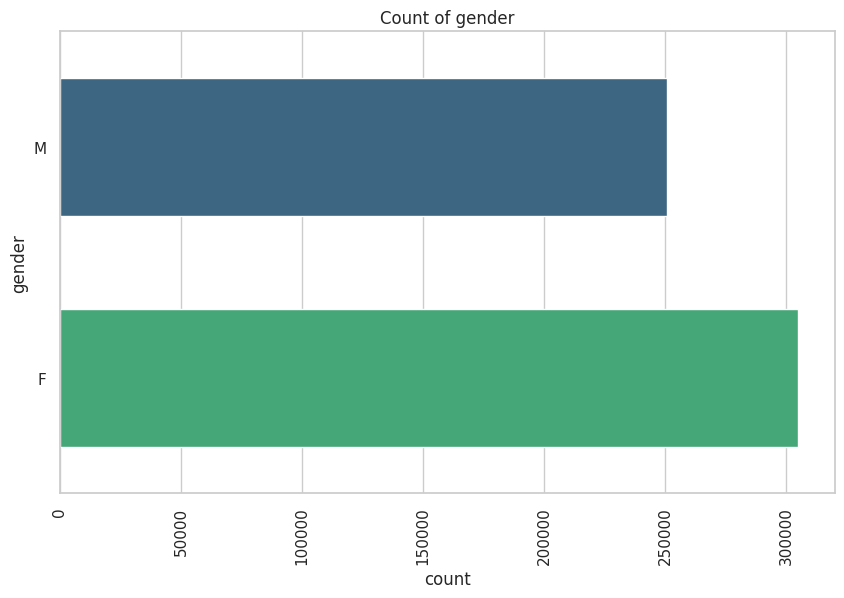

Axes(0.125,0.11;0.775x0.77)


In [32]:
# using seaborn library to see the total count of object column
ob=['category','gender']
for i in ob:
  plt.figure(figsize=(10,6))
  count=sns.countplot(df[i],palette='viridis',width=0.6)
  plt.xticks(rotation=90)
  plt.title(f"Count of {i}")
  plt.show()
  print(count)

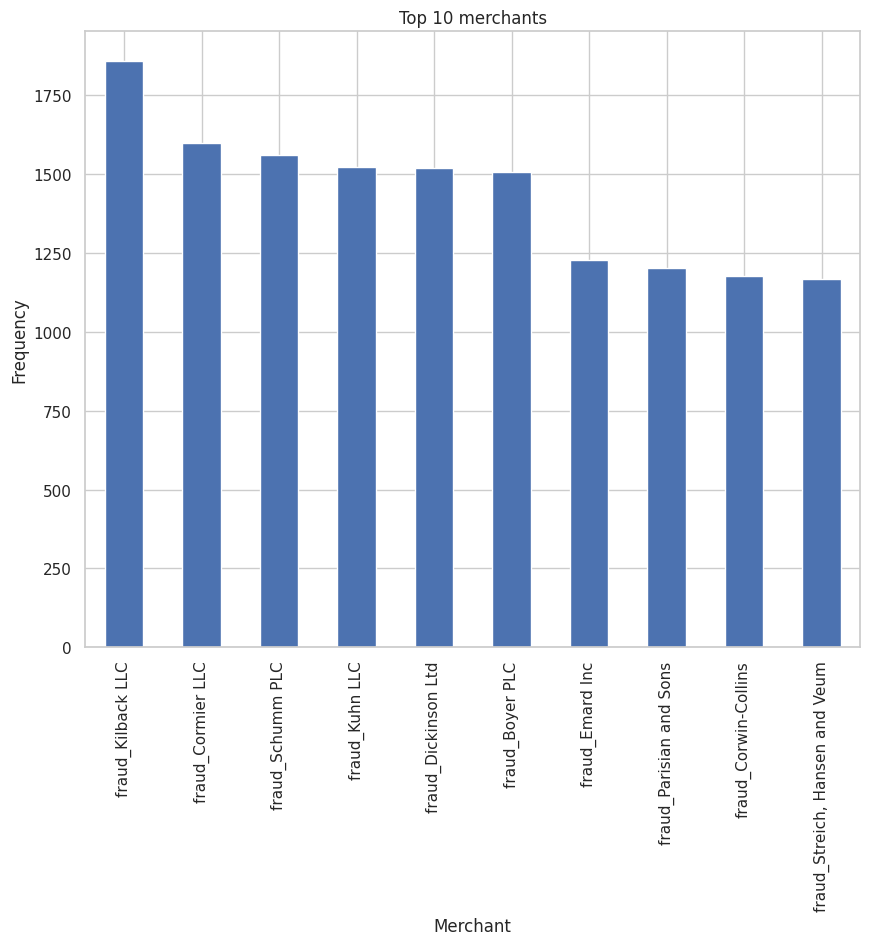

In [33]:
# top 10 merchant by using pandas and matplotlib
top_merchants = df["merchant"].value_counts().head(10)
plt.figure(figsize=(10, 8))
top_merchants.plot(kind='bar')
plt.title("Top 10 merchants")
plt.xlabel("Merchant")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

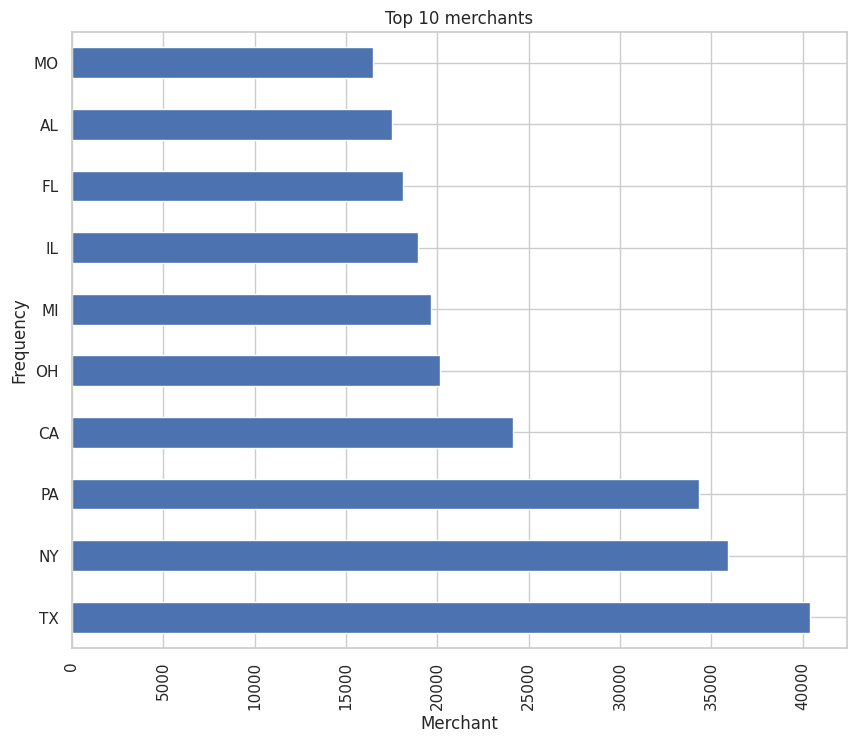

In [34]:
# top 10 state by using pandas and matplotlib
top_state = df["state"].value_counts().head(10)

plt.figure(figsize=(10, 8))
top_state.plot(kind='barh')
plt.title("Top 10 merchants")
plt.xlabel("Merchant")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [35]:
# to check the outliers in datsaset using IQR with for loop
for outliers in df.select_dtypes(include={"int64","float"}):
  Q1=df[outliers].quantile(0.25)
  Q3=df[outliers].quantile(0.75)
  print(f"{outliers} percentile")
  print(f"25th percentile is {Q1}")
  print(f"75th percentile is {Q3}")
  IQR=Q3-Q1
  LL=Q1 - 1.5*  IQR
  UL=Q3 + 1.5 * IQR
  print(f"IQR of {outliers} {IQR}" )
  print(f"Range of Normal values {LL,UL}")
  print()

Outliers=(df[(df[outliers]<LL) | (df[outliers]>UL)])

amt percentile
25th percentile is 9.63
75th percentile is 83.01
IQR of amt 73.38000000000001
Range of Normal values (-100.44000000000003, 193.08000000000004)

is_fraud percentile
25th percentile is 0.0
75th percentile is 0.0
IQR of is_fraud 0.0
Range of Normal values (0.0, 0.0)



In [36]:
# Total outliers in our dataset
Outliers

,merchant,category,amt,gender,state,job,is_fraud
1685,fraud_Hamill-D'Amore,health_fitness,24.84,F,TX,Cytogeneticist,1
1767,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,M,WI,Public relations officer,1
1781,fraud_Nienow PLC,entertainment,620.33,M,WI,Public relations officer,1
1784,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,M,LA,Herbalist,1
1857,fraud_Hermann and Sons,shopping_pos,842.65,F,TX,Cytogeneticist,1
...,...,...,...,...,...,...,...
517197,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,M,MS,Database administrator,1
517274,fraud_Kuhn LLC,shopping_pos,868.09,M,MS,Database administrator,1
517341,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,MS,Database administrator,1
517529,fraud_Bauch-Raynor,grocery_pos,289.27,M,MS,Database administrator,1


### Checking Outliers in dataset

In [37]:
Total=len(Outliers)

In [38]:
print("Total Outliers in our dataset is ",Total)

Total Outliers in our dataset is  2145


In [39]:
# Total Outliers are 2145 is our dataset so dataset is huge it will not affect that much

In [40]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'job', 'is_fraud'], dtype='object')

In [41]:
# to convert the object dataset in numerical format
df[['merchant', 'category','gender', 'state', 'job']]=df[['merchant', 'category','gender', 'state', 'job']].apply(LabelEncoder().fit_transform)

In [42]:
df.head()

,merchant,category,amt,gender,state,job,is_fraud
0,319,10,2.86,1,39,275,0
1,591,10,29.84,0,43,392,0
2,611,5,41.28,0,33,259,0
3,222,9,60.05,1,8,407,0
4,292,13,3.19,1,21,196,0


In [43]:
# to drop the loan_status column from X and just including loan_status column for y
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [44]:
y.value_counts()# 0 not fraud 1 fraud

is_fraud
0    553574
1      2145
Name: count, dtype: int64

### train_test_split

In [45]:
# splitting the datatset of X and y so that we can check how much model is accurate
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=44)

print(f" Total Data of X is {X.shape}\n 80% for Training data {X_train.shape}\n 20% for Testing,{X_test.shape}")

 Total Data of X is (555719, 6)
 80% for Training data (444575, 6)
 20% for Testing,(111144, 6)


### Balanceing the dataset

In [46]:
# To make the dataset in balance need to use SMOTE
smote = SMOTE(sampling_strategy = 'auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [47]:
X_train = X_resampled
y_train = y_resampled

# Model Training

### Logistic Regression

In [48]:
# Logistic Regression
lr=LogisticRegression()

In [49]:
# it training your dastset
lr.fit(X_train,y_train)

LogisticRegression()

In [50]:
# predicting the values using Logistic Regression
y_pred_lr=lr.predict(X_test)

In [51]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y_test

471502    0
140262    0
61196     0
221277    0
501959    0
         ..
36409     0
425990    0
453634    0
215029    0
500480    0
Name: is_fraud, Length: 111144, dtype: int64

In [53]:
# it shows how much it is accurate it is
accuracy_lr=accuracy_score(y_test,y_pred_lr)

In [54]:
print("Accuracy of Logistic regression is ",accuracy_lr*100,"%")

Accuracy of Logistic regression is  90.8569063557187 %


In [55]:
# confusion matrix show where the prediction gone wrong it focuses on Right value prediction
cm=confusion_matrix(y_test,y_pred_lr)

In [56]:
# confusion matric of lofistic Regression
cm

array([[100681,  10034],
       [   128,    301]])

Text(46.25, 0.5, 'True Value')

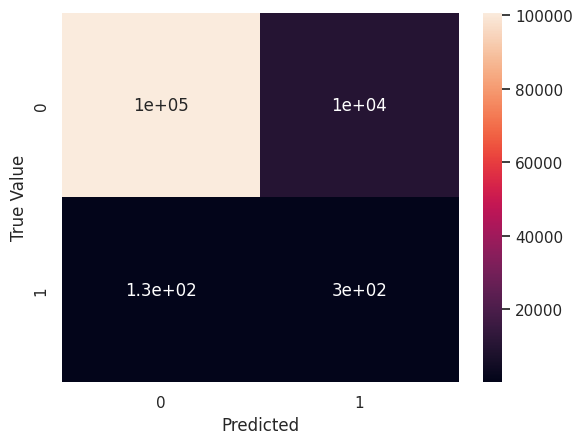

In [57]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [58]:
# Evaluation matrix for Logistic Regression to improve the perfromace ,report of Logistic Regression
Report_lr=classification_report(y_test,y_pred_lr)
print(Report_lr)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    110715
           1       0.03      0.70      0.06       429

    accuracy                           0.91    111144
   macro avg       0.51      0.81      0.50    111144
weighted avg       0.99      0.91      0.95    111144



### Random Forest

In [59]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [60]:
# giving parameters to prevent overfitting
clf=RandomForestClassifier(criterion='gini',
                           max_depth=3,
                           min_samples_split=2,
                           random_state=2)

In [61]:
# Training of dataset with the help of Random Forest
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=2)

In [62]:
# it shows how much impotance your columns is with the help of gini index
clf.feature_importances_*100

array([ 0.08989221,  8.72970014, 73.56633732,  9.6371141 ,  6.62738486,
        1.34957138])

In [63]:
y_pred_clf=clf.predict(X_test)

In [64]:
# Predictio of Random Forest
y_pred_clf

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
# Accuracy Score of Random Foests
accuracy_clf=accuracy_score(y_pred_clf,y_test)

In [83]:
accuracy_clf


0.9766968977182754

In [66]:
# Confusion Matrix of Radom Forest
cm_clf=confusion_matrix(y_pred_clf,y_test)

In [67]:
cm_clf

array([[108254,    129],
       [  2461,    300]])

In [68]:
# Classificatio report of Random Forest
Report_clf=classification_report(y_pred_clf,y_test)

In [69]:
print(Report_clf)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    108383
           1       0.70      0.11      0.19      2761

    accuracy                           0.98    111144
   macro avg       0.84      0.55      0.59    111144
weighted avg       0.97      0.98      0.97    111144



In [70]:
print("Accuracy score of Random Forest:",accuracy_score(y_pred_clf,y_test)*100)

Accuracy score of Random Forest: 97.66968977182754


### ADA BOOST

In [71]:
#AdaBoost Classifier Algorithm
from sklearn.ensemble import AdaBoostClassifier

In [72]:
ada = AdaBoostClassifier(random_state = 0)

In [73]:
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [74]:
y_pred_ada=ada.predict(X_test)

In [75]:
# Prediction with the help of ADA boost
y_pred_ada

array([0, 0, 0, ..., 1, 0, 0])

In [76]:
accuracy_score_ada=accuracy_score(y_pred_ada,y_test)

In [77]:
print("Accuracy score of ADA boost:",accuracy_score_ada*100)

Accuracy score of ADA boost: 93.7180594544015


In [78]:
# confusion matrix show where the prediction gone wrong it focuses on Right value prediction
cm_ada=confusion_matrix(y_test,y_pred_ada)

In [79]:
cm_ada

array([[103813,   6902],
       [    80,    349]])

Text(46.25, 0.5, 'True Value')

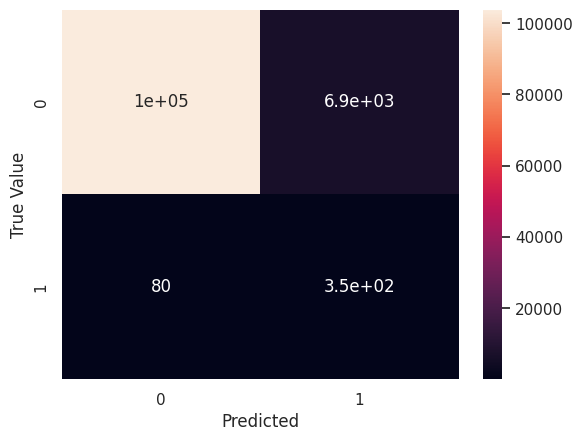

In [80]:
sns.heatmap(cm_ada,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [81]:
# Evaluation matrix for ADA Boost to improve the perfromace ,report of ADA Boost
Report_ada=classification_report(y_test,y_pred_ada)
print(Report_ada)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    110715
           1       0.05      0.81      0.09       429

    accuracy                           0.94    111144
   macro avg       0.52      0.88      0.53    111144
weighted avg       1.00      0.94      0.96    111144



# Results and Comparision

In [82]:
# The highest accuracy we got by using Random forest ,followed by ADA boost  and Logistic Regreesion
print("Logistic Regression Accuracy:",accuracy_lr*100,"%")
print("Random Forest Accuracy",accuracy_clf*100,"%")
print("ADA BOOST Accuracy",accuracy_score_ada*100,"%")

Logistic Regression Accuracy: 90.8569063557187 %
Random Forest Accuracy 97.66968977182754 %
ADA BOOST Accuracy 93.7180594544015 %
